# Tutorial 6: Optimization of lattice parameters 

## Import libraries

In [1]:
import siman #program package to manage DFT calculations https://github.com/dimonaks/siman
from siman.calc_manage import smart_structure_read, get_structure_from_matproj
from siman.calc_manage import add, res
from siman.set_functions import read_vasp_sets
from siman.database import write_database, read_database
from siman.header import db
read_database() # read saved database if available
import project_sets # should be after read_database
varset = read_vasp_sets(project_sets.user_vasp_sets, override_global = 0) #read user sets


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/home/t.goryacheva/simanrc.py was read


## Read POSCAR

**Every calculation object which can be called as *db['name.set.number']* includes two structure objects:**

*db[...].init* - with initial geometry

*db[...].end* - with geometry after DFT calculation, which can differ from initial one if relaxation was occured***

In [2]:
st = db['Li.static_opt.1'].end #structure object with end geometry
st.printme()

Full Formula (Li2)
Reduced Formula: Li
abc   :   3.491000   3.491000   3.491000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Li    0    0    0
  1  Li    0.5  0.5  0.5


## Create a new set for ionic relaxation

We add a key NSW = 20 that means to perform DFT calculation with 20 relaxation steps.

The key ISIF responds for relaxation type, 2 means only ionic relaxation. See VASP manual for more information

In [3]:
varset = read_vasp_sets([('ion_relax_opt', 'static_opt', {'ISIF':2, 'NSW':20, 'EDIFFG':-0.025}, 'override')]) #new set 'ion_relax' from 'static' with 'NSW' = 20
print('NSW = ', varset['ion_relax_opt'].vasp_params['NSW'])


Attention! You have chosen to override set ion_relax_opt
 

Warning! You did not change  ISIF  in ion_relax_opt set
 

NSW =  20


In [4]:
add('Li', 'ion_relax_opt', 1, input_st = st, it_folder = 'Li/', run = 0)

-- Attention!, cluster None is not found, using default raz 

Warning! TOO FEW BANDS!!!


Warning! TOO FEW BANDS!!!
 

--                           |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- db['Li.ion_relax_opt.1']      |Li.ion_relax_opt.1|  -3.7941   |3.49, 3.49, 3.49|  -535,-535,-535    |   1, 9,  9    
-- check_kpoints(): Kpoint   mesh is:  [9, 9, 9] 

-- check_kpoints(): The actual k-spacings are  [0.2 0.2 0.2] 

-- POSCAR was written to Li///Li.ion_relax_opt/1.POSCAR 

-- Attention! ngkpt =  [9, 9, 9]  is adopted from struct_des which you provided for it  Li  and kspacing =  0.2 


Calculation ('Li', 'ion_relax_opt', 1) successfully created

 



'Li'

In [5]:
res('Li', 'ion_relax_opt', 1)

Warning! TOO FEW BANDS!!!


Warning! TOO FEW BANDS!!!
 



Max. F. tot  (meV/A) = 
[0]; 

--                           |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- db['Li.ion_relax_opt.1']      |Li.ion_relax_opt.1|  -3.7941   |3.49, 3.49, 3.49|  -535,-535,-535    |   1, 9,  9    


(["db['Li.ion_relax_opt.1']      |Li.ion_relax_opt.1|  -3.7941   |3.49, 3.49, 3.49|  -535,-535,-535    |   1, 9,  9   "],
 [])

## Relaxation energy

In [6]:
E_relax = 1000*(db['Li', 'ion_relax_opt', 1].e0 - db['Li', 'static_opt', 1].e0) #in meV
print(f'Relaxation energy = {E_relax} meV')


Relaxation energy = 9.99999993922529e-06 meV


## Optimize cell volume

In [7]:
add('Li', 'ion_relax_opt', 1, input_st = st, it_folder = 'Li/', 
    calc_method = 'uniform_scale', scale_region = (-5, 5), run = 0)

-- Attention!, cluster None is not found, using default raz 

-- add_loop_scale(): Preparing   scale  calculation ...  

-- inherit_ngkpt(): the k-grid from Li was inherited to Li.su 

-- File xyz/Li.static_opt.1.end_used_for_scaling.xyz was written 

-- Scale_region is (-5, 5) 

Scales are [-5.         -3.33333333 -1.66666667  0.          1.66666667  3.33333333
  5.        ] 

-- Warning! File ./Li//Li.su/Li.su.auto_created_scaled_image.1.geo was replaced 

-- File xyz/Li.su.1.xyz was written 

-- Warning! File ./Li//Li.su/Li.su.auto_created_scaled_image.2.geo was replaced 

-- File xyz/Li.su.2.xyz was written 

-- Warning! File ./Li//Li.su/Li.su.auto_created_scaled_image.3.geo was replaced 

-- File xyz/Li.su.3.xyz was written 

-- Warning! File ./Li//Li.su/Li.su.auto_created_scaled_image.4.geo was replaced 

-- File xyz/Li.su.4.xyz was written 

-- Warning! File ./Li//Li.su/Li.su.auto_created_scaled_image.5.geo was replaced 

-- File xyz/Li.su.5.xyz was written 

-- Warning! File ./

'Li.su'

Warning! TOO FEW BANDS!!!


Warning! TOO FEW BANDS!!!
 

--                           |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- db['Li.su.ion_relax_opt.1']   |Li.su.ion_relax_opt.1|  -3.7734   |3.32, 3.32, 3.32|  1855,1855,1855    |   1,10, 10    
Warning! TOO FEW BANDS!!!


Warning! TOO FEW BANDS!!!
 

-- db['Li.su.ion_relax_opt.2']   |Li.su.ion_relax_opt.2|  -3.7905   |3.38, 3.38, 3.38|    950,950,950     |   1, 9,  9    
Warning! TOO FEW BANDS!!!


Warning! TOO FEW BANDS!!!
 

-- db['Li.su.ion_relax_opt.3']   |Li.su.ion_relax_opt.3|  -3.7970   |3.43, 3.43, 3.43|    125,125,125     |   1, 9,  9    
Warning! TOO FEW BANDS!!!


Warning! TOO FEW BANDS!!!
 

-- db['Li.su.ion_relax_opt.4']   |Li.su.ion_relax_opt.4|  -3.7941   |3.49, 3.49, 3.49|  -535,-535,-535    |   1, 9,  9    
Warning! TOO FEW BANDS!!!


Warning! TOO FEW BANDS!!!
 

-- db['Li.su.ion_relax_opt.5']   |Li.su.ion_relax_opt.5|  -3.7830   |3.55, 3.55, 3.55| -1078,-1078,-1078  |   1, 9, 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Warning! TOO FEW BANDS!!!


Warning! TOO FEW BANDS!!!
 

-- db['Li.su.ion_relax_opt.100'] |Li.su.ion_relax_opt.100|  -3.7971   |3.44, 3.44, 3.44|    -29,-29,-29     |   1, 9,  9    
alpha, energy: 90.00, -3.773
alpha, energy: 90.00, -3.791
alpha, energy: 90.00, -3.797
alpha, energy: 90.00, -3.794
alpha, energy: 90.00, -3.783
alpha, energy: 90.00, -3.765
alpha, energy: 90.00, -3.740
alpha, energy: 90.00, -3.797
-- Image saved to  figs/angle.eps 


            v0 = 40.81196646953933 A^3
            a0 = 3.4429377754071333 A
            E0 = -3.7971346543688886 eV
            B  = 0.08715258966209205 eV/A^3 



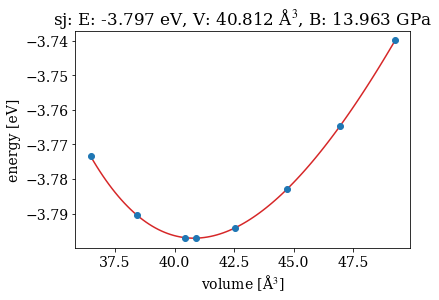

-- fit results are saved in  figs/Li.su.ion_relax_opt.100.png 



(["db['Li.su.ion_relax_opt.100'] |Li.su.ion_relax_opt.100|  -3.7971   |3.44, 3.44, 3.44|    -29,-29,-29     |   1, 9,  9   "],
 [])

In [8]:
res('Li.su', 'ion_relax_opt', list(range(1,8))+[100], show = 'fit', analys_type = 'fit_a')

In [9]:
db['Li.su.ion_relax_opt.100'].end.write_poscar('Li_opt.POSCAR') #write optimized structure

-- POSCAR was written to Li_opt.POSCAR 



'Li_opt.POSCAR'

## Calculate the optimization energy

In [10]:
dE = 1000*(db['Li.su.ion_relax_opt.100'].energy_sigma0 - db['Li.static_opt.1'].energy_sigma0)
print(f'Optimization energy = {dE} meV')

Optimization energy = -3.0673500000002463 meV


In [11]:
write_database()


Database has been successfully updated

